# COURSE: A deep understanding of deep learning

## SECTION: Metaparameters (activation, batch, optimizers)

### LECTURE: The "wine quality" dataset

#### TEACHER: Mike X Cohen, sincxpress.com

##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210


In [1]:
### import libraries

# for DL modeling
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Import and process the data


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# describe the data
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# list number of unique values per column

for i in data.keys():
    print(f"{i} has {len(np.unique(data[i]))} unique values")


fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


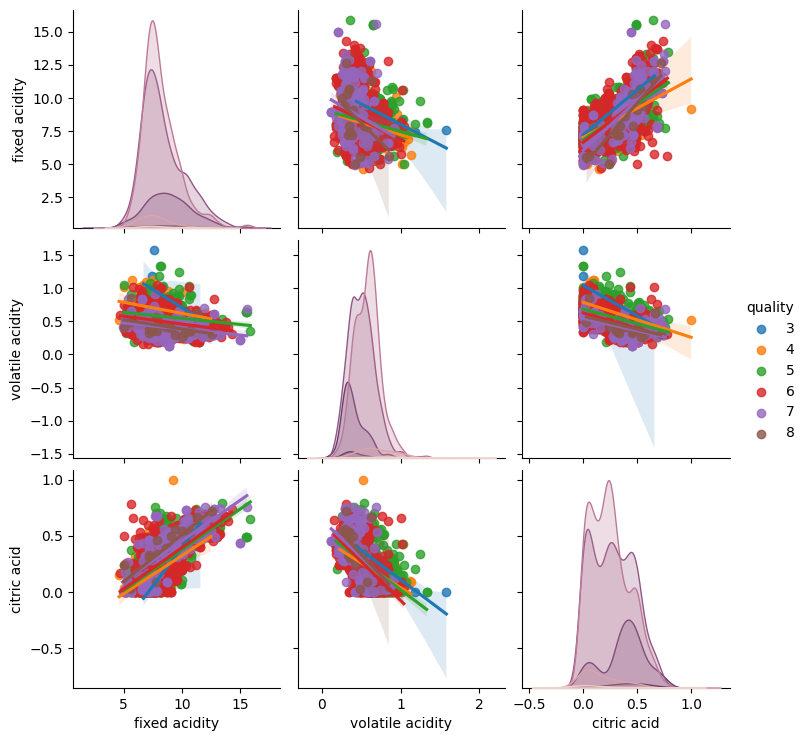

In [5]:
# pairwise plots
#plt.figure()
cols2plot = ["fixed acidity", "volatile acidity", "citric acid", "quality"]
sns.pairplot(data[cols2plot], kind="reg", hue="quality")
plt.show()
plt.close()

/home/caio/.pyenv/versions/3.10.6/envs/PyTorch/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/caio/.pyenv/versions/3.10.6/envs/PyTorch/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


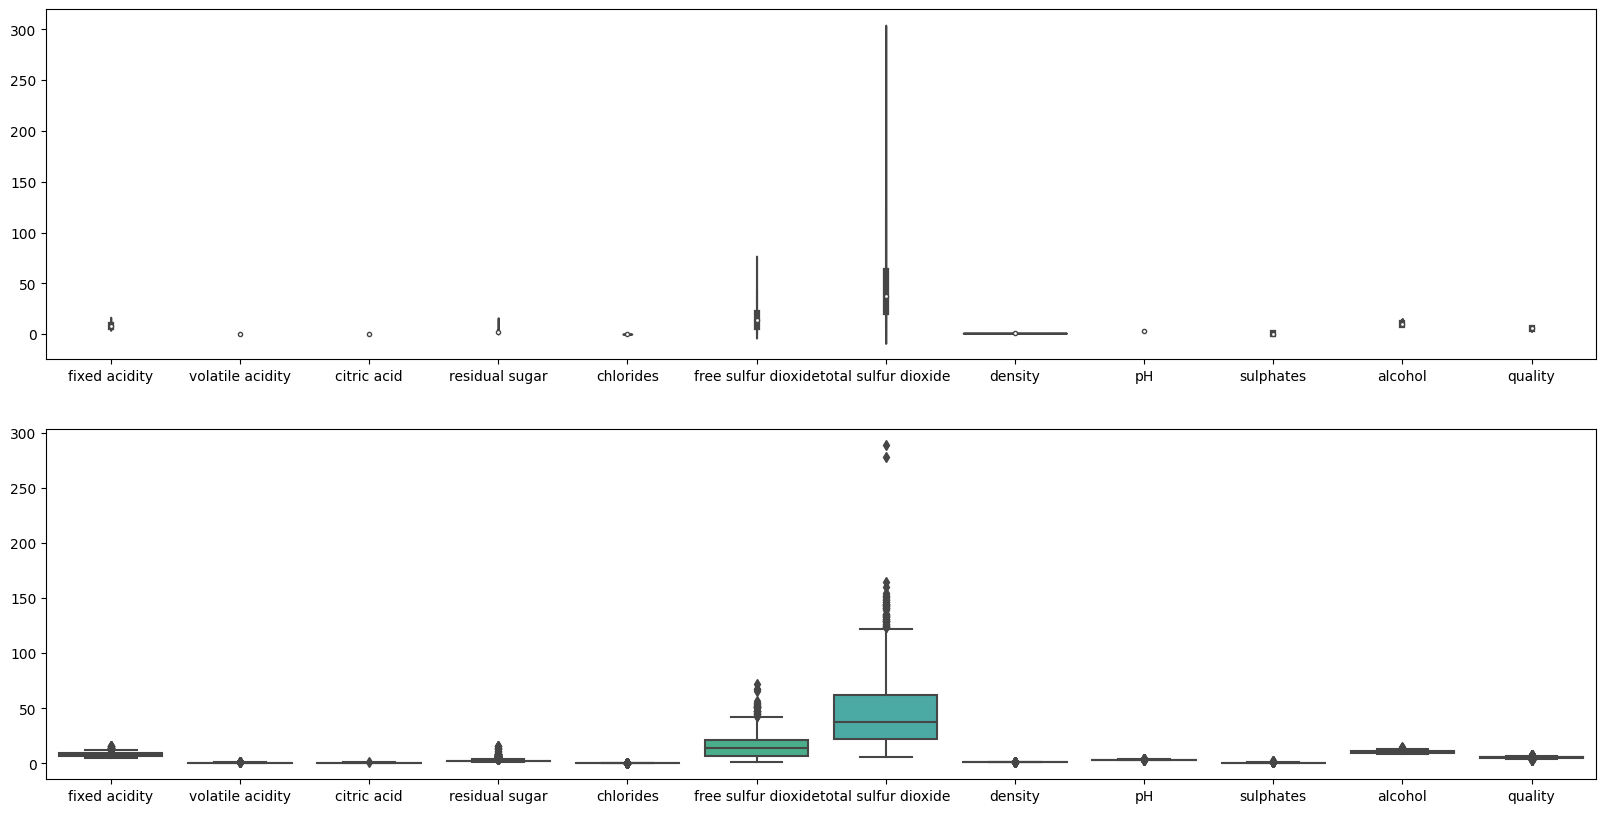

In [6]:
# plot some data
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.violinplot(data=data, orient='v', ax=ax[0])
sns.boxplot(data=data, orient='v', ax=ax[1])
plt.show()
plt.close()

In [7]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
data = data[data['total sulfur dioxide']<200]
cols2zscore = data.columns.drop("quality").to_list()
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

/tmp/ipykernel_17083/708578920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols2zscore] = data[cols2zscore].apply(stats.zscore)


/home/caio/.pyenv/versions/3.10.6/envs/PyTorch/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/caio/.pyenv/versions/3.10.6/envs/PyTorch/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


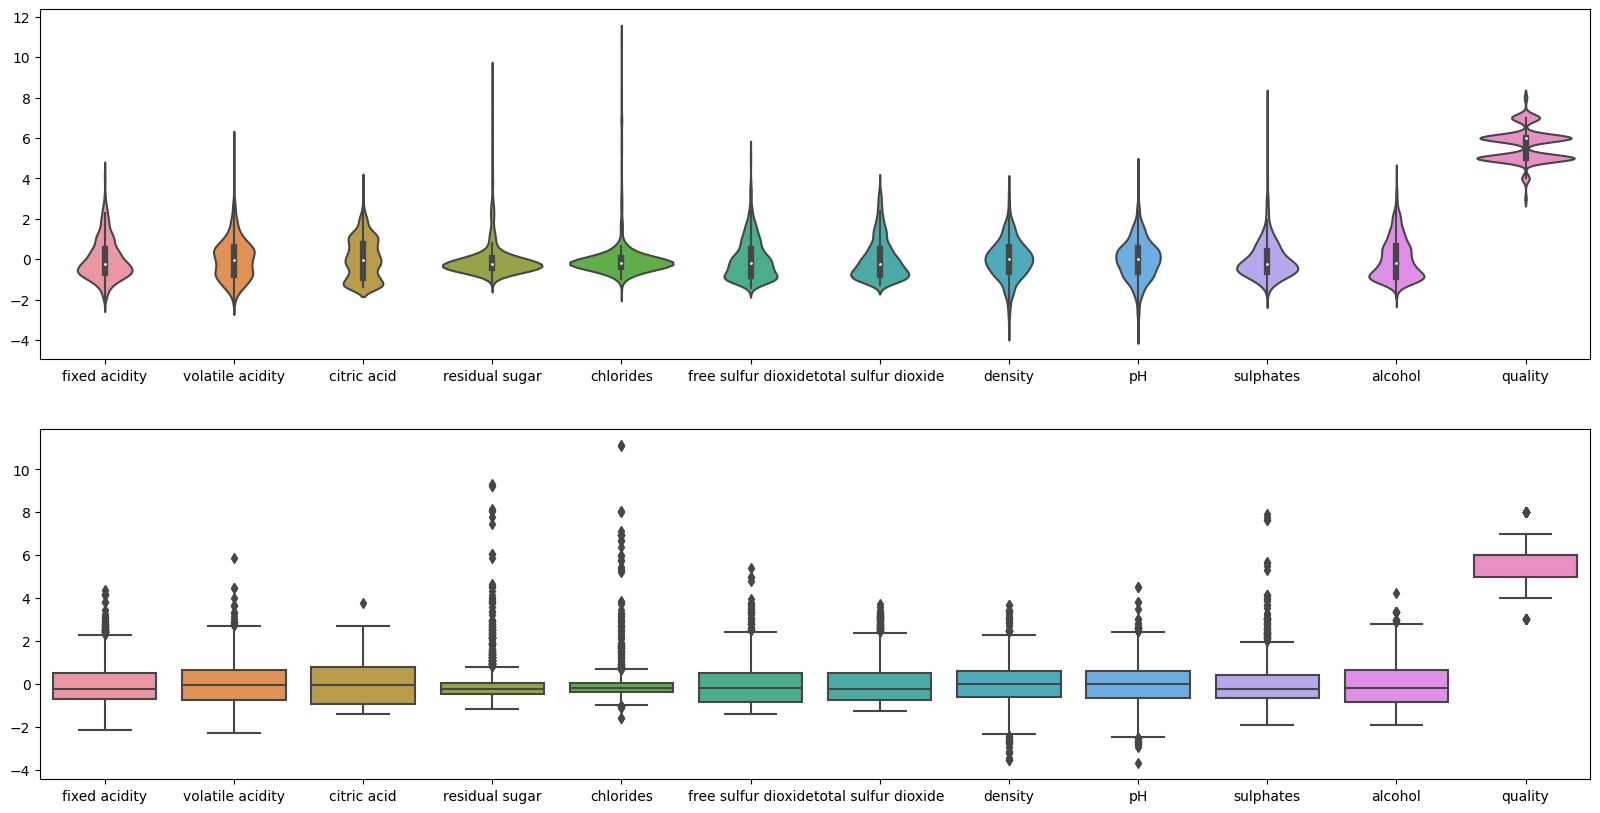

In [8]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.violinplot(data=data, orient='v', ax=ax[0])
sns.boxplot(data=data, orient='v', ax=ax[1])
plt.show()
plt.close()

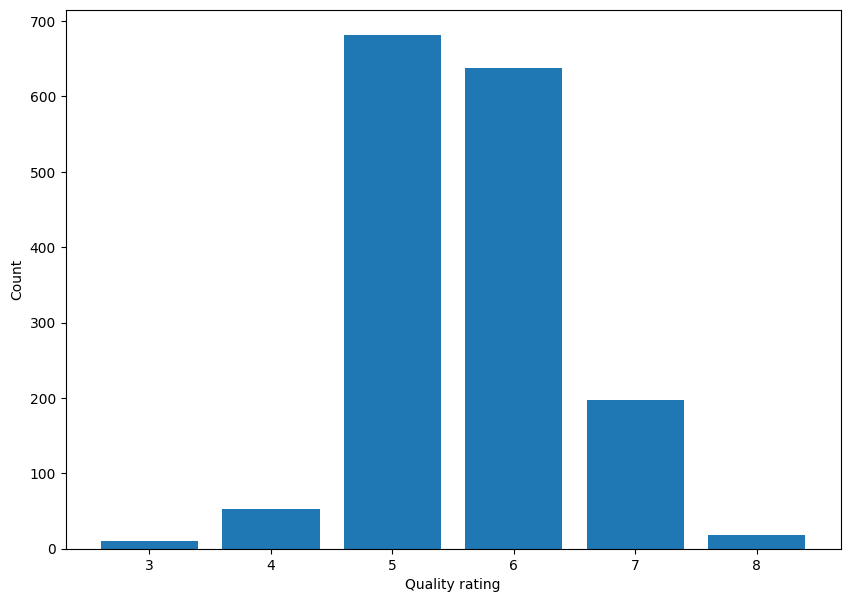

/tmp/ipykernel_17083/3729129942.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["boolQuality"] = 0
/tmp/ipykernel_17083/3729129942.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["boolQuality"][data["quality"] > 5] = 1
/tmp/ipykernel_17083/3729129942.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["boolQuality"][data["quality"] > 5] = 1


,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [9]:
# distribution quality values
fig = plt.figure(figsize=(10, 7))
#plt.rcParams.update({"font.size": 22})  # increase font size in the figure

counts = data["quality"].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel("Quality rating")
plt.ylabel("Count")
plt.show()

# create a new column for binarized (boolean) quality
data["boolQuality"] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data["boolQuality"][data["quality"] > 5] = 1

data[["quality", "boolQuality"]]


# Re-organize the data: train/test in DataLoaders


In [16]:
# convert from pandas dataframe to tensor
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data["boolQuality"].values).float()

print(dataT.shape)
print(labels.shape)

# we'll actually need the labels to be a "tensor"
labels = labels.reshape(-1, 1)
print(labels.shape)


torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [11]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(
    dataT, labels, test_size=0.1
)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)


# finally, translate into dataloader objects
batchsize = 64
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])


In [12]:
# check sizes of data batches
for X, y in train_loader:
    print(X.shape, y.shape)

# go back and set drop_last=True in training DataLoader


torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([29, 11]) torch.Size([29, 1])


# Additional explorations


In [13]:
# 1) In a later video, we will use DL to predict residual sugar. Use seaborn to make a histogram of that data column.
#    Spend a minute to explore the visualization options in sns.histplot. For example, you can add a kernel density
#    estimate, make the histogram bars purple, and so on.
#
# 2) (Warning: This exercise is for people who are familiar with statistics.) Loop over all the variables in the dataset,
#    and perform an independent-samples t-test on the data for the binarized wine quality. Which variables are significantly
#    different between "low" and "high" quality wine?
#
